**Database Connectivity**

In [114]:
import mysql.connector as my
import pandas as pd
import matplotlib.pyplot as plt
conn=my.connect(
    host="localhost",
    user="root",
    password="Annu@0512",
    database="Ecommerce",
    port=3306)

cursor = conn.cursor()
cursor.execute("SELECT * FROM Customer")
result = cursor.fetchall()
columns = cursor.column_names
Customer = pd.DataFrame(result, columns=columns)


cursor.execute("SELECT * FROM Product")
result1 = cursor.fetchall()
columns1 = cursor.column_names
Product = pd.DataFrame(result1, columns=columns1)


cursor.execute("SELECT * FROM Order_details")
result2 = cursor.fetchall()
columns2 = cursor.column_names
Order = pd.DataFrame(result2, columns=columns2)


print("Customer Details:\n",Customer)
print("\nProducts Detail:\n",Product)
print("\nOrder Details:\n",Order)
cursor.close()
conn.close()


Customer Details:
    Customer_ID             Name       City                        Email  \
0      CUST001    Laxmi Kashyap  Ghaziabad    laxmi.kashyap@example.com   
1      CUST002     Priya Sharma  Ghaziabad     priya.sharma@example.com   
2      CUST003  Nishtha Chauhan  Ghaziabad  nishtha.chauhan@example.com   
3      CUST004       Sunita Rao  Bangalore       sunita.rao@example.com   
4      CUST005       Ravi Verma    Chennai       ravi.verma@example.com   
5      CUST006      Kiran Desai       Pune      kiran.desai@example.com   
6      CUST007       Neha Gupta    Kolkata       neha.gupta@example.com   
7      CUST008     Vikram Singh     Jaipur     vikram.singh@example.com   
8      CUST009       Meera Nair      Kochi       meera.nair@example.com   
9      CUST010     Sanjay Mehta  Hyderabad     sanjay.mehta@example.com   
10     CUST011      Aarti Patel      Surat      aarti.patel@example.com   
11     CUST012      Rohit Kumar  Ahmedabad      rohit.kumar@example.com   
12    

**Data Cleaning**

In [115]:
# Check for missing values
missing_values = Customer.isnull().sum()
missing_values1 = Product.isnull().sum()
missing_values2 = Order.isnull().sum()
print("\nMissing Values on Customer Data:\n", missing_values)
print("\nMissing Values on Product Data:\n", missing_values1)
print("\nMissing Values on Order Data:\n", missing_values2)

# Ensure data types are appropriate
print("Customer Data Types:\n", Customer.dtypes)
print("\nProduct Data Types:\n", Product.dtypes)
print("\nOrder Details Data Types:\n",Order.dtypes)

Customer['Pin_code'] = Customer['Pin_code'].astype('Int64')
Product['Original_Price'] = Product['Original_Price'].astype(float)
Product['Selling_Price'] = Product['Selling_Price'].astype(float)
Order['Order_Date'] = pd.to_datetime(Order['Order_Date'])

# Fill missing values or drop rows/columns
Customer.fillna({'Email': 'unknown@example.com', 'Pin_code': 0}, inplace=True)
Product.dropna(subset=['Product_Name', 'Category'], inplace=True)  # Example: Drop rows with missing Product_Name or Category
Order.fillna({'Order_Date': pd.Timestamp.now(), 'Order_Status': 'Pending'}, inplace=True)  # Fill missing Order_Date with current timestamp and Order_Status with 'Pending'



Missing Values on Customer Data:
 Customer_ID    0
Name           0
City           0
Email          0
Phone_No       0
Address        0
Pin_code       0
dtype: int64

Missing Values on Product Data:
 Product_ID        0
Product_Name      0
Category          0
Sub_category      0
Original_Price    0
Selling_Price     0
Stock             0
dtype: int64

Missing Values on Order Data:
 Order_ID        0
Customer_ID     0
Product_ID      0
Quantity        0
Total_Price     0
Payment_Mode    0
Order_Date      0
Order_Status    0
dtype: int64
Customer Data Types:
 Customer_ID    object
Name           object
City           object
Email          object
Phone_No       object
Address        object
Pin_code        int64
dtype: object

Product Data Types:
 Product_ID         object
Product_Name       object
Category           object
Sub_category       object
Original_Price    float64
Selling_Price     float64
Stock               int64
dtype: object

Order Details Data Types:
 Order_ID             

**Exploratory Data Analysis (EDA) and Visualization:**

● Customer Analysis:

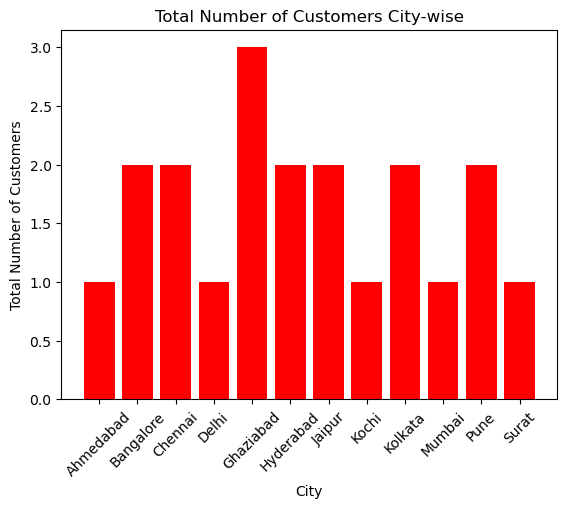

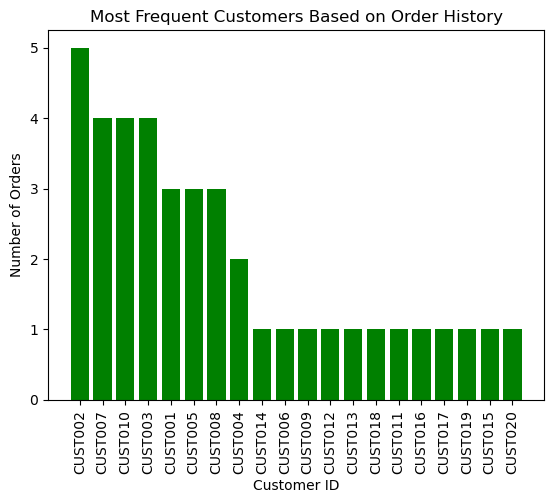

In [116]:
# Identify the total number of customers City wise
city_wise_count = Customer.groupby('City').size().reset_index(name='Total_Customers')
plt.bar(city_wise_count['City'], city_wise_count['Total_Customers'], color='Red')
plt.xlabel('City')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers City-wise')
plt.xticks(rotation=45)
plt.show()


# Identify the most frequent customers based on their order history.
customer_order_count = Order['Customer_ID'].value_counts().reset_index()
customer_order_count.columns = ['Customer_ID', 'Number_of_Orders']
most_frequent_customers = customer_order_count.sort_values(by='Number_of_Orders', ascending=False)

plt.bar(most_frequent_customers['Customer_ID'], most_frequent_customers['Number_of_Orders'], color='green')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Most Frequent Customers Based on Order History')
plt.xticks(rotation=90)
plt.show()


**Product Analysis**

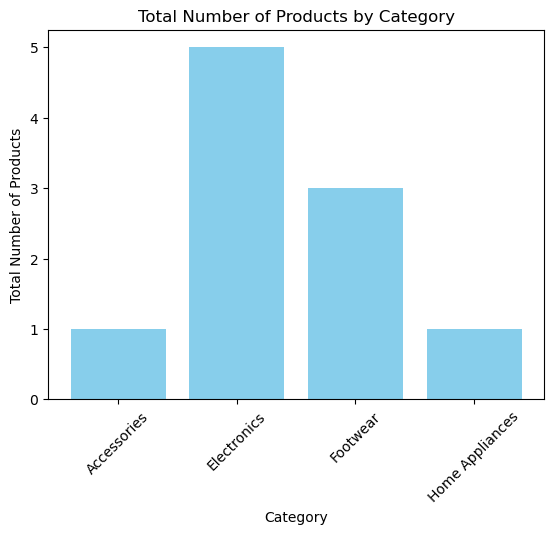

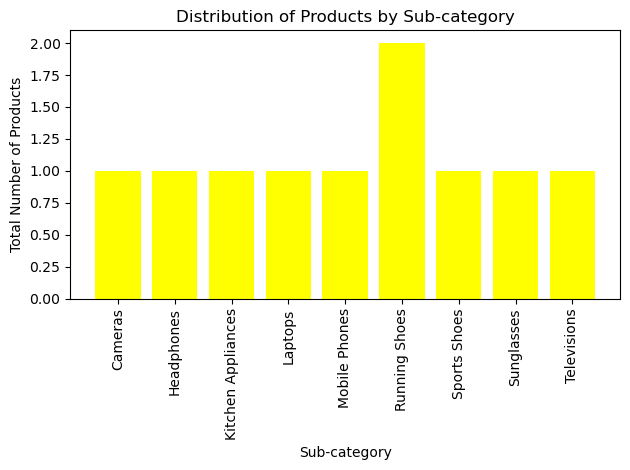

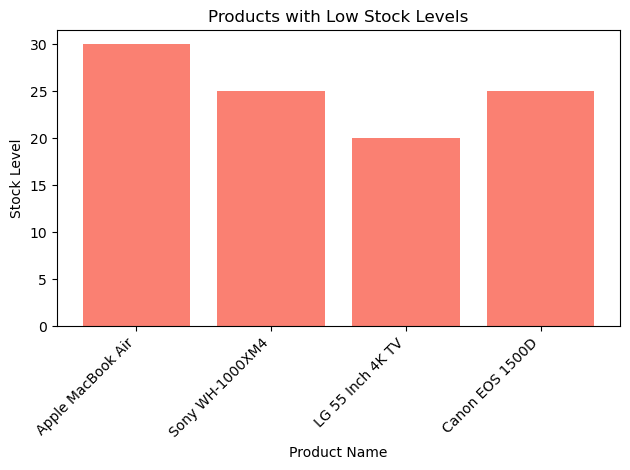

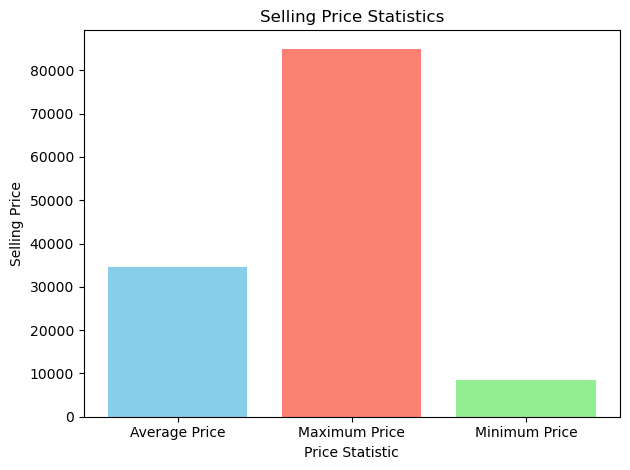

In [103]:
#  Determine the total number of products available by category.
category_wise_count = Product.groupby('Category').size().reset_index(name='Total_Products')
plt.bar(category_wise_count['Category'], category_wise_count['Total_Products'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Number of Products')
plt.title('Total Number of Products by Category')
plt.xticks(rotation=45)
plt.show()


# Analyze the distribution of products across sub-categories
sub_category_distribution = Product.groupby('Sub_category').size().reset_index(name='Total_Products')
plt.bar(sub_category_distribution['Sub_category'], sub_category_distribution['Total_Products'], color='yellow')
plt.xlabel('Sub-category')
plt.ylabel('Total Number of Products')
plt.title('Distribution of Products by Sub-category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Identify products with low stock levels
low_stock_threshold = 40
low_stock_products = Product[Product['Stock'] < low_stock_threshold]
plt.bar(low_stock_products['Product_Name'], low_stock_products['Stock'], color='salmon')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Calculate the average, maximum, and minimum selling prices for products.
average_price = Product['Selling_Price'].mean()
maximum_price = Product['Selling_Price'].max()
minimum_price = Product['Selling_Price'].min()
price_stats = {
    'Average Price': average_price,
    'Maximum Price': maximum_price,
    'Minimum Price': minimum_price
}
plt.bar(price_stats.keys(), price_stats.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Price Statistic')
plt.ylabel('Selling Price')
plt.title('Selling Price Statistics')
plt.tight_layout()
plt.show()



**Order Analysis:**

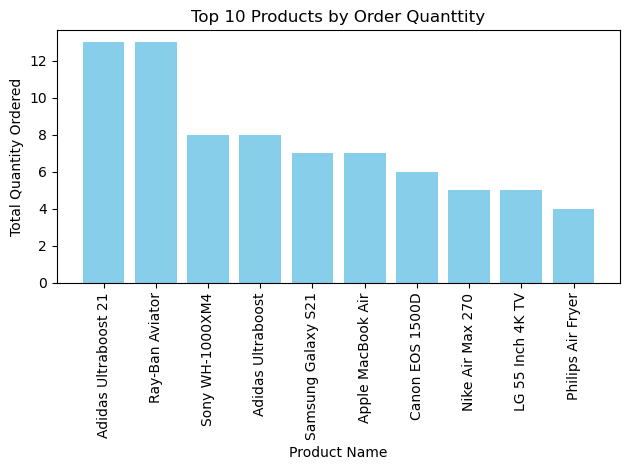

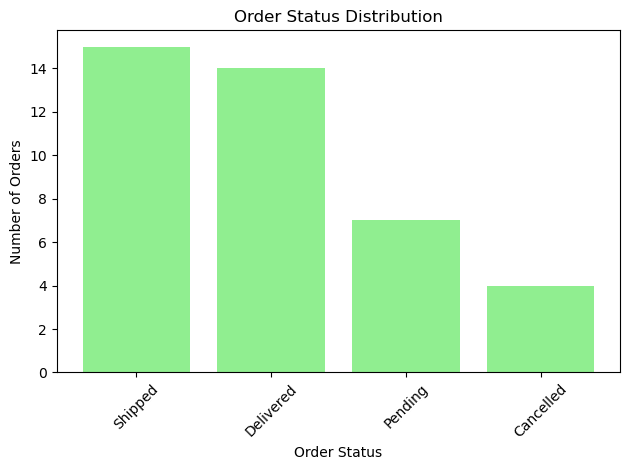

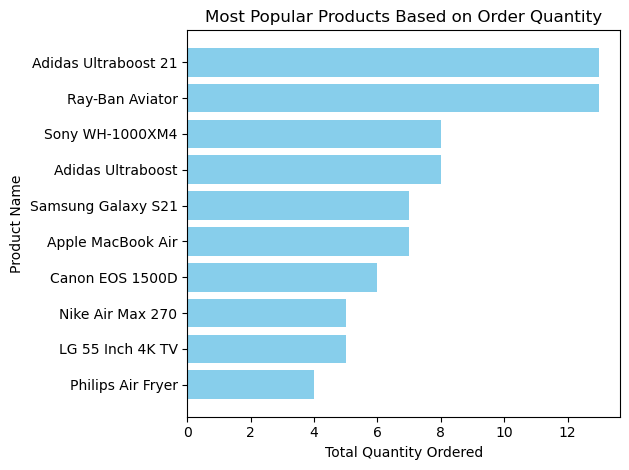

In [117]:
# Calculate the top 10 orders product wise.
product_order_totals = Order.groupby('Product_ID')['Quantity'].sum().reset_index()
top_10_products = product_order_totals.sort_values(by='Quantity', ascending=False).head(10)
top_10_products = top_10_products.merge(Product, on='Product_ID')

plt.bar(top_10_products['Product_Name'], top_10_products['Quantity'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 10 Products by Order Quanttity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Analyze the order status distribution (e.g., pending, delivered).
order_status_distribution = Order['Order_Status'].value_counts().reset_index()
order_status_distribution.columns = ['Order_Status', 'Count']
plt.bar(order_status_distribution['Order_Status'], order_status_distribution['Count'], color='lightgreen')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Identify the most popular products based on order quantity.
popular_products = Order.groupby('Product_ID')['Quantity'].sum().reset_index()
popular_products = popular_products.sort_values(by='Quantity', ascending=False)
popular_products = popular_products.merge(Product[['Product_ID', 'Product_Name']], on='Product_ID')

plt.barh(popular_products['Product_Name'],popular_products['Quantity'], color='skyblue')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Most Popular Products Based on Order Quantity')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.tight_layout()
plt.show()


#**Sales Analysis:**

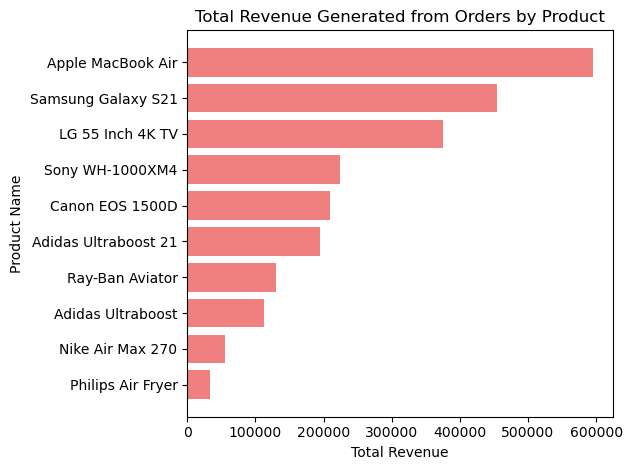

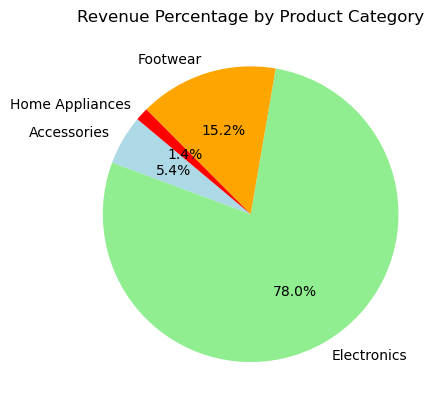

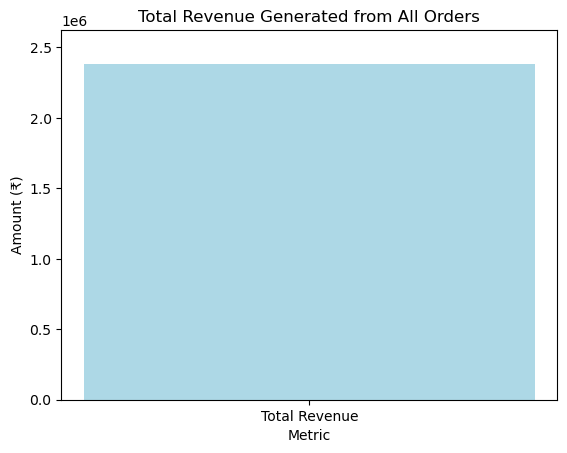

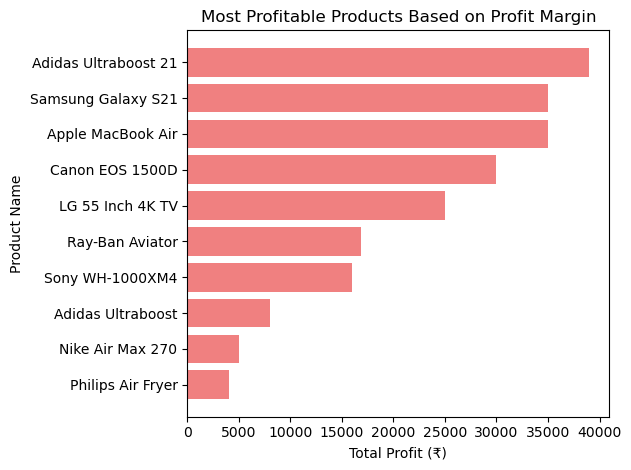

In [118]:
# Calculate total revenue generated from orders product wise.
merged_df = Order.merge(Product[['Product_ID', 'Selling_Price']], on='Product_ID')
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Selling_Price']
total_revenue = merged_df.groupby('Product_ID')['Revenue'].sum().reset_index()
total_revenue = total_revenue.merge(Product[['Product_ID', 'Product_Name']], on='Product_ID')
total_revenue = total_revenue.sort_values(by='Revenue', ascending=False)

plt.barh(total_revenue['Product_Name'], total_revenue['Revenue'], color='lightcoral')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.title('Total Revenue Generated from Orders by Product')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest revenue at the top
plt.tight_layout()
plt.show()


# Calculate total revenue product category wise percentage.
merged_df = Order.merge(Product[['Product_ID', 'Category', 'Selling_Price']], on='Product_ID')
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Selling_Price']
category_revenue = merged_df.groupby('Category')['Revenue'].sum().reset_index()
total_revenue_sum = category_revenue['Revenue'].sum()
category_revenue['Percentage'] = (category_revenue['Revenue'] / total_revenue_sum) * 100

plt.pie(category_revenue['Revenue'], labels=category_revenue['Category'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange', 'red'], startangle=140)
plt.title('Revenue Percentage by Product Category')
plt.show()


# Calculate the total revenue generated from all orders
merged_df = Order.merge(Product[['Product_ID', 'Selling_Price']], on='Product_ID')
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Selling_Price']
total_revenue = merged_df['Revenue'].sum()

categories = ['Total Revenue']
values = [total_revenue]
plt.bar(categories, values, color='lightblue')
plt.xlabel('Metric')
plt.ylabel('Amount (₹)')
plt.title('Total Revenue Generated from All Orders')
plt.ylim(0, total_revenue * 1.1)  # Adjust y-axis to fit the bar nicely
plt.show()


#Identify the most profitable products based on the difference between original and selling prices.
merged_df = Order.merge(Product[['Product_ID', 'Original_Price', 'Selling_Price']], on='Product_ID')
merged_df['Profit_Per_Unit'] = merged_df['Original_Price'] - merged_df['Selling_Price']
merged_df['Total_Profit'] = merged_df['Profit_Per_Unit'] * merged_df['Quantity']
profit_by_product = merged_df.groupby('Product_ID')['Total_Profit'].sum().reset_index()
profit_by_product = profit_by_product.merge(Product[['Product_ID', 'Product_Name']], on='Product_ID')
profit_by_product = profit_by_product.sort_values(by='Total_Profit', ascending=False)

plt.barh(profit_by_product['Product_Name'], profit_by_product['Total_Profit'], color='lightcoral')
plt.xlabel('Total Profit (₹)')
plt.ylabel('Product Name')
plt.title('Most Profitable Products Based on Profit Margin')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest profits at the top
plt.tight_layout()
plt.show()



#**Customer Order Patterns:**

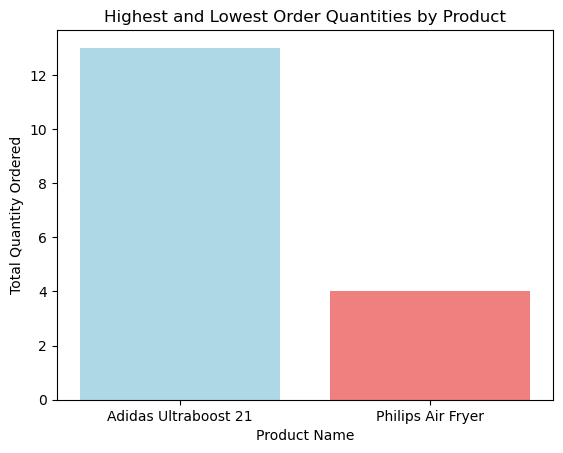

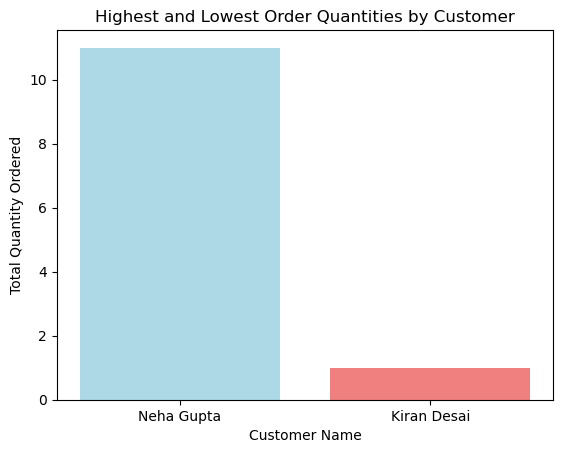

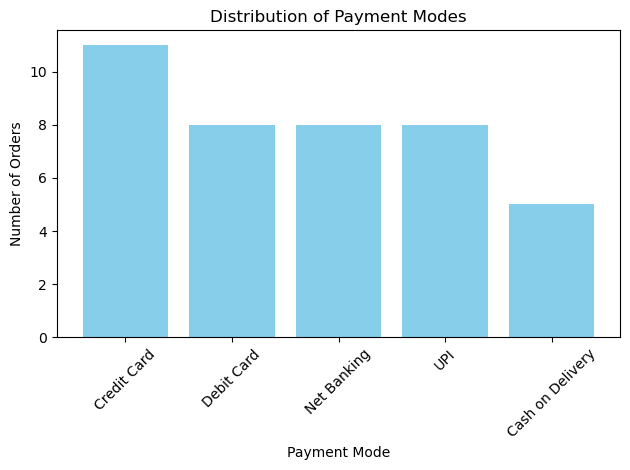

In [119]:
# Identify product names with the highest and lowest order quantities.
merged_df = Order.merge(Product[['Product_ID', 'Product_Name']], on='Product_ID')
quantity_by_product = merged_df.groupby('Product_ID')['Quantity'].sum().reset_index()
quantity_by_product = quantity_by_product.merge(Product[['Product_ID', 'Product_Name']], on='Product_ID')
highest_qty_product = quantity_by_product.loc[quantity_by_product['Quantity'].idxmax()]
lowest_qty_product = quantity_by_product.loc[quantity_by_product['Quantity'].idxmin()]

product_names = [highest_qty_product['Product_Name'], lowest_qty_product['Product_Name']]
quantities = [highest_qty_product['Quantity'], lowest_qty_product['Quantity']]
plt.bar(product_names, quantities, color=['lightblue', 'lightcoral'])
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Highest and Lowest Order Quantities by Product')
plt.show()


# Identify customers with the highest and lowest order quantities by customer name.
customer_quantity_df = Order.merge(Customer[['Customer_ID', 'Name']], on='Customer_ID')
quantity_by_customer = customer_quantity_df.groupby('Customer_ID')['Quantity'].sum().reset_index()
quantity_by_customer = quantity_by_customer.merge(Customer[['Customer_ID', 'Name']], on='Customer_ID')
highest_qty_customer = quantity_by_customer.loc[quantity_by_customer['Quantity'].idxmax()]
lowest_qty_customer = quantity_by_customer.loc[quantity_by_customer['Quantity'].idxmin()]


customer_names = [highest_qty_customer['Name'], lowest_qty_customer['Name']]
quantities = [highest_qty_customer['Quantity'], lowest_qty_customer['Quantity']]
plt.bar(customer_names, quantities, color=['lightblue', 'lightcoral'])
plt.xlabel('Customer Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Highest and Lowest Order Quantities by Customer')
plt.show()


# Determine the most preferred payment modes.
payment_mode_counts = Order['Payment_Mode'].value_counts().reset_index()
payment_mode_counts.columns = ['Payment_Mode', 'Number_of_Orders']

plt.bar(payment_mode_counts['Payment_Mode'], payment_mode_counts['Number_of_Orders'], color='skyblue')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Distribution of Payment Modes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#**Time-based Analysis:**

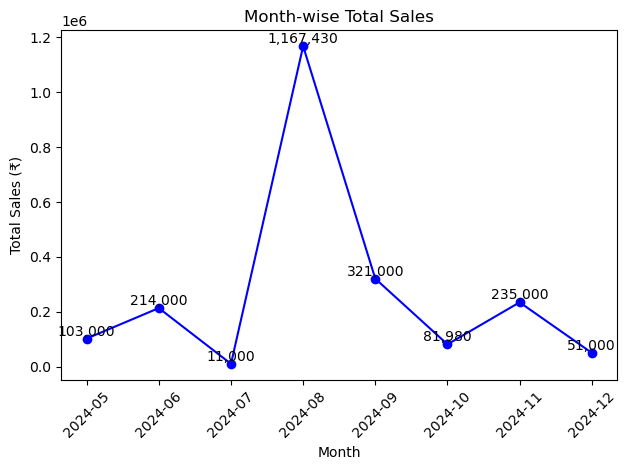

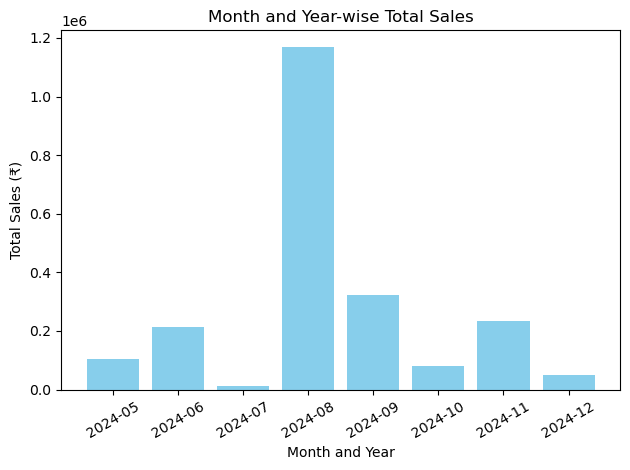

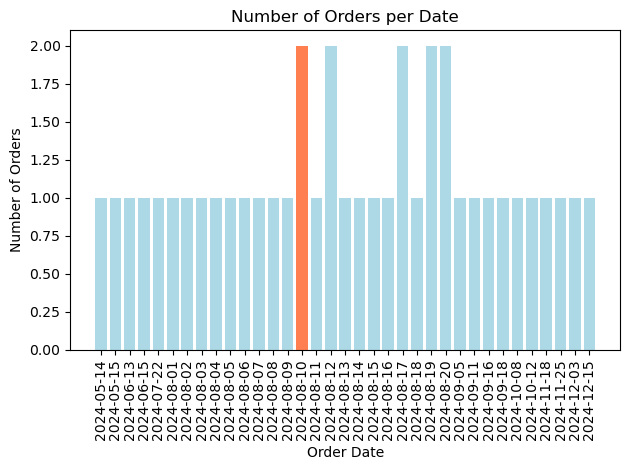

In [120]:
#  Month wise total sales.
Order['Order_Date'] = pd.to_datetime(Order['Order_Date'])
Order['YearMonth'] = Order['Order_Date'].dt.to_period('M')
monthly_sales = Order.groupby('YearMonth')['Total_Price'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.plot(monthly_sales['YearMonth'], monthly_sales['Total_Price'], marker='o', color='b', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
for i, value in enumerate(monthly_sales['Total_Price']):
    plt.text(monthly_sales['YearMonth'][i], value, f'{value:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


# Month and year wise total sales
Order['Order_Date'] = pd.to_datetime(Order['Order_Date'])
Order['YearMonth'] = Order['Order_Date'].dt.to_period('M')
monthly_sales = Order.groupby('YearMonth')['Total_Price'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.bar(monthly_sales['YearMonth'], monthly_sales['Total_Price'], color='skyblue')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales (₹)')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=30) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Identify peak order date.
Order['Order_Date'] = pd.to_datetime(Order['Order_Date'])
Order['Order_Date_only'] = Order['Order_Date'].dt.date
order_counts_by_date = Order.groupby('Order_Date_only').size().reset_index(name='Order_Count')
peak_order_date = order_counts_by_date.loc[order_counts_by_date['Order_Count'].idxmax()]

plt.bar(order_counts_by_date['Order_Date_only'].astype(str), order_counts_by_date['Order_Count'], color='lightblue')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Date')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.bar(peak_order_date['Order_Date_only'].strftime('%Y-%m-%d'), peak_order_date['Order_Count'], color='coral')
plt.tight_layout()
plt.show()


#**Geographical Analysis:**

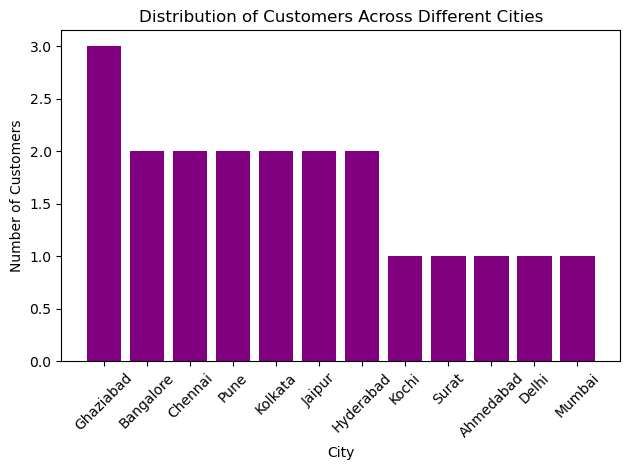

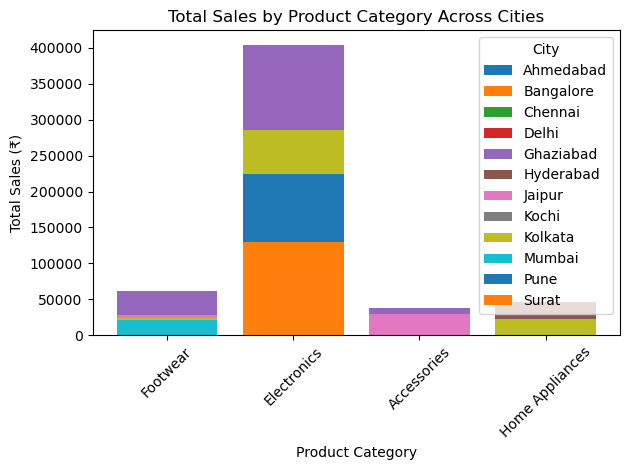

In [121]:
#Explore the distribution of customers across different cities.
customer_counts_by_city = Customer['City'].value_counts().reset_index()
customer_counts_by_city.columns = ['City', 'Number_of_Customers']

plt.bar(customer_counts_by_city['City'], customer_counts_by_city['Number_of_Customers'], color='purple')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Different Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analyze whether certain products or categories are more popular in a specific city.
order_customer_product_df = Order.merge(Customer[['Customer_ID', 'City']], on='Customer_ID')
order_customer_product_df = order_customer_product_df.merge(Product[['Product_ID', 'Product_Name', 'Category']], on='Product_ID')
sales_by_city_category = order_customer_product_df.groupby(['City', 'Category'])['Total_Price'].sum().reset_index()
cities = sales_by_city_category['City'].unique()

for city in cities:
    city_data = sales_by_city_category[sales_by_city_category['City'] == city]
    plt.bar(city_data['Category'], city_data['Total_Price'], label=city)
plt.xlabel('Product Category')
plt.ylabel('Total Sales (₹)')
plt.title('Total Sales by Product Category Across Cities')
plt.legend(title='City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add value labels on the bars

# Show plot
plt.tight_layout()
plt.show()



#**Product Performance:**

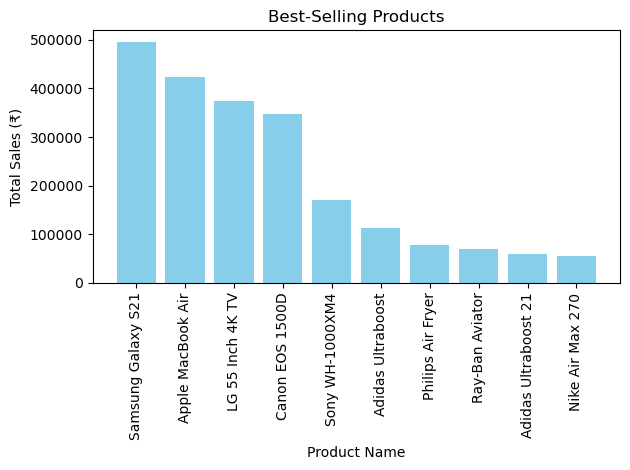

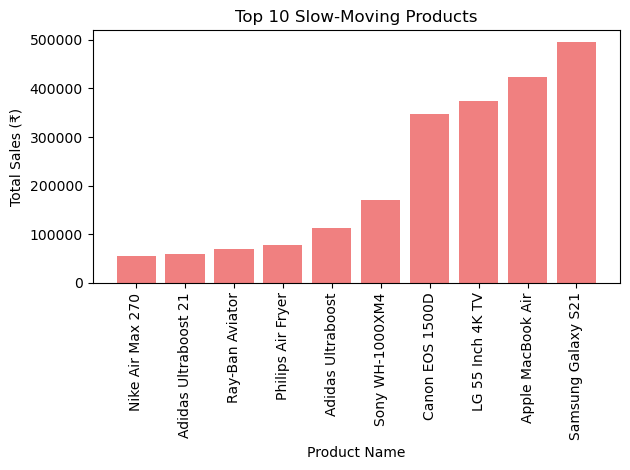

In [122]:
# Identify the best-selling products
order_product_df = Order.merge(Product[['Product_ID', 'Product_Name']], on='Product_ID')
sales_by_product = order_product_df.groupby('Product_Name')['Total_Price'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Total_Price', ascending=False)

plt.bar(sales_by_product['Product_Name'], sales_by_product['Total_Price'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (₹)')
plt.title('Best-Selling Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Identify top 10 slow-moving products based on low sales.
order_product_df = Order.merge(Product[['Product_ID', 'Product_Name']], on='Product_ID')
sales_by_product = order_product_df.groupby('Product_Name')['Total_Price'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Total_Price', ascending=True)
slow_moving_products = sales_by_product.head(10)

plt.bar(slow_moving_products['Product_Name'], slow_moving_products['Total_Price'], color='lightcoral')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (₹)')
plt.title('Top 10 Slow-Moving Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



#**Payment Analysis:**

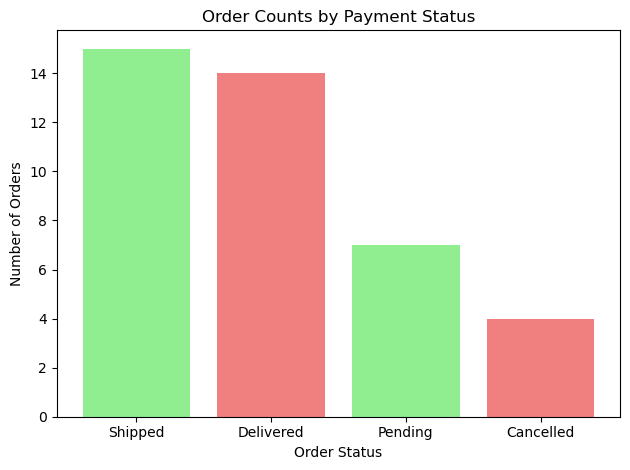

In [123]:
# Display successful and pending payments order counts.
order_status_counts = Order['Order_Status'].value_counts().reset_index()
order_status_counts.columns = ['Order_Status', 'Order_Count']
plt.bar(order_status_counts['Order_Status'], order_status_counts['Order_Count'], color=['lightgreen', 'lightcoral'])
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Counts by Payment Status')
plt.tight_layout()
plt.show()

# **SUMMARY**

**Customer Distribution:**
Customers are spread across various cities, with notable concentrations in major urban areas. Targeted marketing and promotional efforts could be more effective if focused on cities with higher customer numbers.

**Product Performance:**
Certain products and categories, such as Electronics and Running Shoes, have high sales volumes and revenue. Monitoring low stock levels for popular items and optimizing pricing based on average, maximum, and minimum prices is essential.

**Order Trends:**
High-volume orders and popular products are driving sales. Addressing pending and cancelled orders can improve overall order fulfillment efficiency. The focus should be on maintaining stock levels for top-selling products.

**Sales and Revenue:**
Total revenue shows a strong performance across multiple products, with significant contributions from high-margin items. Emphasis should be on promoting products with high revenue and profitability while reviewing performance in underperforming categories.

**Customer Order Patterns:**
Identifying customers with frequent orders and high purchase volumes can help in creating loyalty programs. Preferred payment modes should be leveraged for streamlined transactions.

**Time-Based Sales Trends:**
Sales are influenced by specific months and dates. Preparing for peak sales periods and managing inventory accordingly can optimize revenue.

**Geographical Insights:**
Different cities show varying product preferences. Tailoring inventory and marketing strategies based on regional popularity can enhance sales.

**Product Performance:**
Best-selling products should be highlighted in promotions, while slow-moving products may need review or discounts to boost sales.

**Customer Retention:**
Strategies to increase customer retention, such as loyalty programs and personalized offers, could capitalize on repeat purchasing behaviors.

**Payment Analysis:**
Efficient handling of payment statuses and resolution of pending payments are crucial for maintaining cash flow and customer satisfaction.

# **Future Work:**

**Customer Segmentation**
Demographic Insights: Collect additional demographic data (e.g., age, gender, income) to better understand customer segments and tailor marketing strategies accordingly.
Behavioral Patterns: Analyze customer behavior such as browsing history, cart abandonment rates, and response to promotions to refine targeting strategies.

**Competitor Analysis**
Market Comparison: Collect data on competitors’ pricing, promotions, and product offerings to understand market positioning and identify competitive advantages.
Benchmarking: Compare your performance metrics with industry benchmarks to identify areas for improvement and best practices.

**Advanced Analytics**
Predictive Analytics: Implement predictive analytics to forecast future trends, sales, and customer behavior based on historical data.
Machine Learning: Explore machine learning techniques for advanced customer segmentation, personalized recommendations, and predictive modeling.

**Seasonal and Trend Analysis**
Seasonal Trends: Collect data on seasonal trends and events that influence buying patterns to better forecast demand and plan inventory.
Emerging Trends: Monitor emerging market trends and consumer preferences to adapt product offerings and marketing strategies accordingly.
